<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/Por_que_usar_n%C3%BAmeros_complexos_para_processar_dados_de_corrente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por que devo usar números complexos ?

Este é um material complementar sobre a palestra [Técnicas em Python de análise de dados de corrente usando dados do SimCosta](https://github.com/andrebelem/pythonverse/blob/main/An%C3%A1lise_de_Dados_de_Corrente_%5BNortek_hackday%5D.ipynb) no Hackday da Nortek em julho de 2024.

Tudo começou com esta imagem aqui:

<center><img src='https://github.com/andrebelem/pythonverse/blob/main/images/Rotations_on_the_complex_plane.jpg?raw=true' height=200px' style='background-color:white;'></img></center>


A imagem representa os ramos de uma função complexa, especificamente de uma raiz n-ésima de uma função complexa. Esses ramos são representados em um gráfico de **coordenadas polares** com círculos concêntricos e setas que mostram a direção do movimento ao longo dos ramos. Fonte: Kephir|Wikimedia Commons

Essa é talvez a principal vantagem de usar um número complexo para representar um vetor, já que um número complexo $(a + i.b)$ é apenas a rotação de um número regular. E tem mais:

- A *Rotação é fácilmente representada*, já que multiplicar um número complexo por *i* corresponde a uma rotação de 90 graus no plano complexo;
- Além disso, temos *simplicidade algébrica*, já que as operações de adição, subtração e multiplicação de vetores (quando representados como números complexos) são mais diretas e elegantes do que usar coordenadas cartesianas (x, y). Por exemplo, a multiplicação de números complexos combina rotações e escalamentos em uma única operação;
- Temos ainda uma *representação compacta*, já que podemos manter um array complexo (da forma $a+i.b$), que encapsula duas dimensões (real e imaginária), em uma única estrutura;
- Mas e a matemática ? **Muito fácil de manipular**, especialmente se a sua manipulação envolve ondas e oscilações;
- **Magnitude e Fase (ou direção)** é naturalmente representada por números complexos, o que é útil em muitas aplicações, como na análise de correntes na oceanografia.

(Para saber mais de números complexos visite https://www.statisticshowto.com/calculus-problem-solving/complex-analysis/).


# Um pouco de prática vetorial e geometria

Vamos imaginar a nossa figura abaixo, onde um vetor de magnitude 1, e azimute 45° (**em relação ao Norte = 0°**!) se decompõem nos vetores ortogonais *u* e *v* que tem o valor de $cos(45°)$ e $sin(45°)$ = $1/\sqrt(2) \approx 0.707$

<center><img src='https://github.com/andrebelem/pythonverse/blob/main/images/Figuras Sobre projeções e rotações de vetores.jpg?raw=true' height=250px></img></center>

(Note que por questões de precisão do ponto flutuante no Python, você verá muitas casas decimais no resultado!)

In [1]:
import numpy as np

magnitude = 1.0 # magnitude
direction = 45.0 # direção

direction_radians = np.radians(direction)

u,v  = np.array([magnitude * np.cos(direction_radians), magnitude * np.sin(direction_radians)])
print(u,v)

0.7071067811865476 0.7071067811865475


Agora, eu posso transformar em um número complexo tanto com base em magnitude e direção, quanto com base nas componentes *u* e *v*, da seguinte forma:

$z_{complex} = \text{magnitude} \times \exp{(1j \times \text{direção})} $

$z_{complex} = \text{u} + 1j \times \text{v} $

veja como podemos fazer:

In [2]:
complex_vec_1 = magnitude * np.exp(1j * direction_radians)
print(complex_vec_1)

(0.7071067811865476+0.7071067811865475j)


In [3]:
complex_vec_2 = u + 1j * v
print(complex_vec_2)

(0.7071067811865476+0.7071067811865475j)


O mais interessante desse tipo de transformação é que você pode facilmente decompor um vetor dado em magnitude e direção, em *u* e *v*, de forma direta, acessando a parte real e imaginária do vetor complexo (note que pode haver pequenas diferenças por precisão dos números de ponto flutuante):

In [4]:
print(f'mag/dir real:{np.real(complex_vec_1):.3f}  u:{u:.3f}')
print(f'mag/dir imag:{np.imag(complex_vec_1):.3f}  v:{v:.3f}')

mag/dir real:0.707  u:0.707
mag/dir imag:0.707  v:0.707


Vamos agora pegar o nosso `complex_vec_2`que foi obtido com *u* e *v*, e vamos extrair magnitude e direção ....

In [5]:
import cmath # tenho que usar a biblioteca cmath

# Calcular a magnitude
mag_from_uv = abs(complex_vec_2)

# Calcular a direção (ângulo)
dir_from_uv = cmath.phase(complex_vec_2)

# E o resultado é ...
print(f"A magnitude de {complex_vec_2:.3f} é: {mag_from_uv:.3f}")
print(f"A direção (ângulo) de {complex_vec_2:.3f} é: {dir_from_uv:.3f} radianos ou {np.degrees(dir_from_uv):.3f} graus")

A magnitude de 0.707+0.707j é: 1.000
A direção (ângulo) de 0.707+0.707j é: 0.785 radianos ou 45.000 graus


Veja que aqui pegamos um vetor complexo construido com *u* e *v* (`complex_vec_2`) e convertemos para **magnitude** e **direção** SEM fazer operações complicadas trigonométricas !

<center><img src='https://media1.tenor.com/m/O2ZgbQ--_XUAAAAC/spongebob-squarepants-spongebob.gif' height=100px></img></center>

## Projeção ao longo de um azimute

Imagine que você quer decompor seu vetor em uma orientação diferente da original (azimute 0° apontando para o Norte). Isso é muito útil quando queremos extrair um vetor *cross* e outro *along* uma orientação (da linha de costa, por exemplo). Com o vetor em complexo, você pode decompor em um eixo rotacionado por um azimute $\theta$ com uma simples operação !

Note que para provar isso, vou calular um azimute no mesmo ângulo do vetor original que usamos acima. Com isso, a componente $v_{rot}$ resultante **TEM** ser igual a zero e a componente $u_{rot}$ resultante **TEM** que ser igual à **magnitude do vetor original** (pura geometria!).... vamos lá:

In [6]:
theta = 45  # Azimute em graus

# Converter theta de graus para radianos
theta_rad = np.deg2rad(theta)

# Calcular as componentes u (along) e v (cross) rotacionadas
along_rot = complex_vec_1 * np.exp(-1j * theta_rad)
cross_rot = complex_vec_1 * np.exp(1j * (theta_rad + np.pi/2))

# Extrair as partes real e imaginária para obter as componentes u e v
along = np.real(along_rot)
cross = np.imag(cross_rot)

print(f"Componente along_rot: {along:.3f}")
print(f"Componente cross_rot: {cross:.3f}")

Componente along_rot: 1.000
Componente cross_rot: 0.000


Pequenas diferenças podem aparecer devido à precisão dos números de ponto flutuante, mas isso é normal. Por isso estou formatando o resultado para arredondar com 3 casas decimais.

Agora, veja abaixo que ao definir o azimute como 90 graus, as componentes *along* e *cross* se igualam aos valores das componentes *u* e *v* originais, porém com sinal invertido. Isso ocorre porque uma rotação de 90 graus (ou $\pi/2$ radianos) efetivamente inverte a orientação dos eixos.

In [7]:
theta = 2*45  # Azimute em graus

# Converter theta de graus para radianos
theta_rad = np.deg2rad(theta)

# Calcular as componentes u (along) e v (cross) rotacionadas
along_rot = complex_vec_1 * np.exp(-1j * theta_rad)
cross_rot = complex_vec_1 * np.exp(1j * (theta_rad + np.pi/2))

# Extrair as partes real e imaginária para obter as componentes u e v
along = np.real(along_rot)
cross = np.imag(cross_rot)

print(f"Componente along_rot: {along:.3f}")
print(f"Componente cross_rot: {cross:.3f}")

Componente along_rot: 0.707
Componente cross_rot: -0.707


As fórmulas tradicionais com senos, cossenos e tangentes podem parecer coisa do passado. Hoje em dia, ao trabalhar com vetores, é muito mais simples e intuitivo usar números complexos.

<center><img src='https://gifdb.com/images/high/spongebob-patrick-happy-celebration-d6lnwsquw2hhckxy.webp' height=100px></img></center>

# Mas...e a estatística ?

Como podemos calcular um vetor médio com base em vários vetores na forma complexa ? Simples. Da mesma forma que calculamos qualquer média.

In [8]:
# vou criar alguns vetores aleatórios....
import numpy as np

num_vetores = 10

# Gerarndo magnitudes entre 0.5 e 1.2, e ângulos aleatórios entre 25° e 45°...
magnitudes = np.random.uniform(0.5, 1.2, num_vetores)
angles_rad = np.deg2rad(np.random.uniform(25, 45, num_vetores))

# Criando vetores complexos
vetores = magnitudes * np.exp(1j * angles_rad)
vetores

array([0.73699019+0.60213812j, 0.52802005+0.30420788j,
       0.71483399+0.62722689j, 0.44354132+0.25208883j,
       0.79820766+0.49751629j, 0.50202652+0.39813939j,
       0.55136239+0.31665642j, 0.85947257+0.51745101j,
       0.8863522 +0.48364571j, 0.40857507+0.32356827j])

In [9]:
# agora, para eu tirar a média, basta somar, e dividir pelo número !

vetor_medio = np.sum(vetores) / num_vetores
vetor_medio

(0.6429381944995093+0.4322638821224951j)

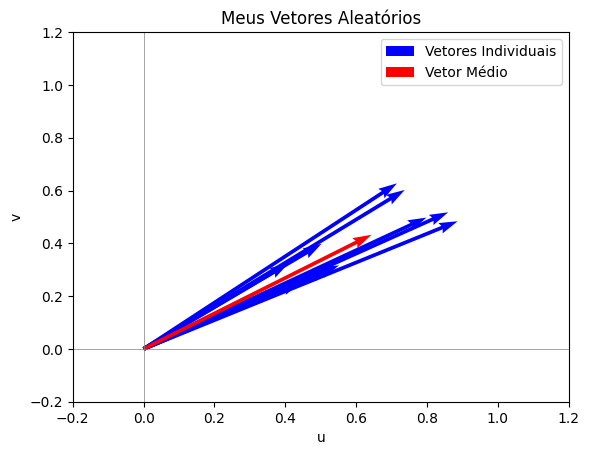

In [10]:
import matplotlib.pyplot as plt

# Extraindo as componentes reais e imaginárias na forma de U e V
u = np.real(vetores)
v = np.imag(vetores)
u_medio = np.real(vetor_medio)
v_medio = np.imag(vetor_medio)

# Criado um gráfico quiver para mostrar a direção
plt.figure()
plt.quiver(np.zeros(num_vetores), np.zeros(num_vetores), u, v, angles='xy', scale_units='xy', scale=1, linewidth=0.5, color='blue', label='Vetores Individuais')
plt.quiver(0, 0, u_medio, v_medio, angles='xy', scale_units='xy', scale=1, linewidth=1.5, color='red', label='Vetor Médio')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel('u')
plt.ylabel('v')
plt.title('Meus Vetores Aleatórios')
plt.legend()
plt.show()

Note que uma simples operação de **SOMA** e divisão pelo número de vetores é suficiente para encontrar um vetor médio. Mas ...

In [11]:
# você pode ainda usar normalmente as funções do numpy
np.median(vetores)

(0.6330981879377586+0.4719416553989719j)

Divirta-se ! E qualquer dúvida, contate [andrebelem@id.uff.br](mailto:andrebelem@id.uff.br).